<h1>Handwriting recognition with Keras</h1>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


load dataset:

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
# Normalize
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

# convert labels
train_labels =keras.utils.to_categorical(mnist_train_labels,10)
test_labels =keras.utils.to_categorical(mnist_test_labels,10)

See sample data

In [3]:
import matplotlib.pyplot as plt
def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image =  train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d'% (num,label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
display_sample(1234)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


<Figure size 640x480 with 1 Axes>

<h2>Constructing the NN</h2>
Input 784 neurons, a 512 neuron inner layer ans the 10 output neuron layer

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Add optimizer and loss function

In [5]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

Train model

In [6]:
history = model.fit(train_images, train_labels,
                   batch_size=100,
                   epochs=10,
                   verbose=2,
                   validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 22s - loss: 0.2424 - acc: 0.9303 - val_loss: 0.1128 - val_acc: 0.9662
Epoch 2/10
 - 5s - loss: 0.0973 - acc: 0.9701 - val_loss: 0.0870 - val_acc: 0.9738
Epoch 3/10
 - 5s - loss: 0.0648 - acc: 0.9810 - val_loss: 0.0777 - val_acc: 0.9766
Epoch 4/10
 - 5s - loss: 0.0469 - acc: 0.9855 - val_loss: 0.0804 - val_acc: 0.9772
Epoch 5/10
 - 5s - loss: 0.0357 - acc: 0.9893 - val_loss: 0.0721 - val_acc: 0.9799
Epoch 6/10
 - 5s - loss: 0.0278 - acc: 0.9922 - val_loss: 0.0739 - val_acc: 0.9803
Epoch 7/10
 - 5s - loss: 0.0219 - acc: 0.9938 - val_loss: 0.0645 - val_acc: 0.9825
Epoch 8/10
 - 5s - loss: 0.0167 - acc: 0.9951 - val_loss: 0.0678 - val_acc: 0.9807
Epoch 9/10
 - 5s - loss: 0.0129 - acc: 0.9962 - val_loss: 0.0712 - val_acc: 0.9821
Epoch 10/10
 - 5s - loss: 0.0107 - acc: 0.9972 - val_loss: 0.0721 - val_acc: 0.9826


In [7]:
score = model.evaluate(test_images, test_labels, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07212136252327618
Test accuracy: 0.9826


Visualize the wrong ones

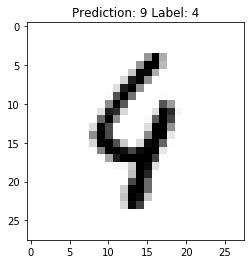

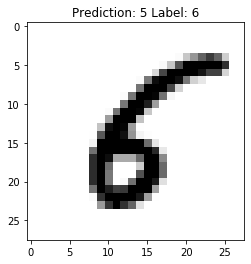

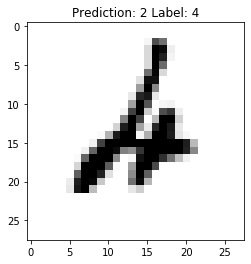

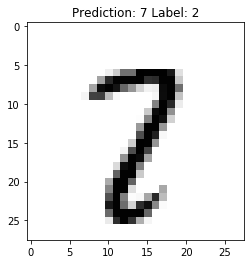

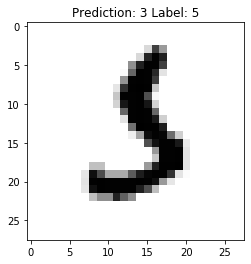

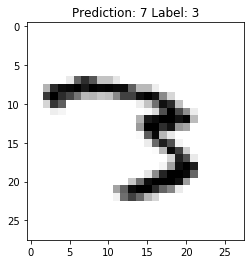

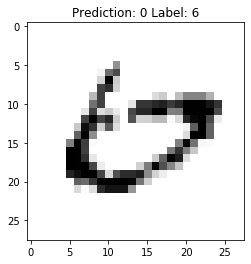

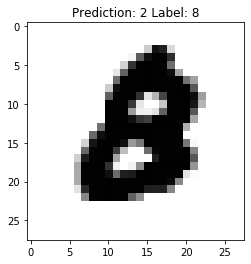

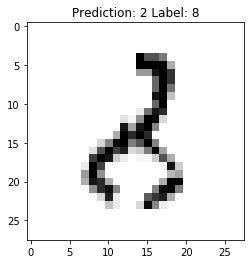

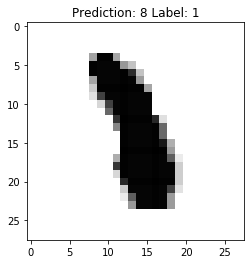

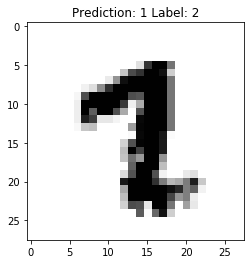

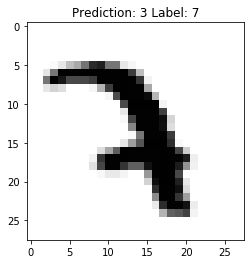

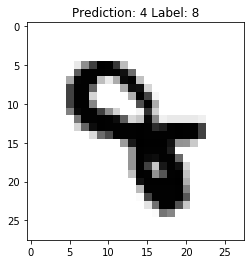

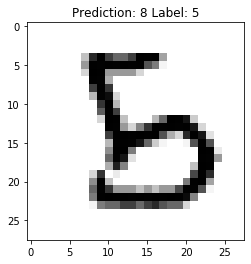

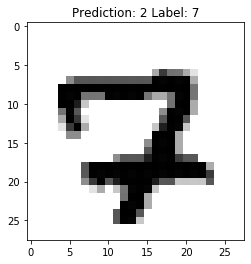

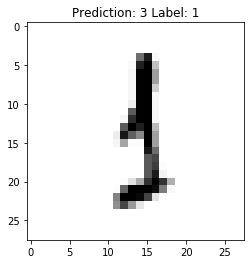

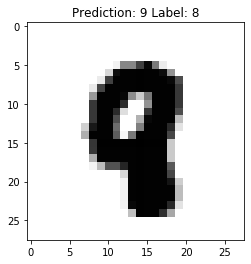

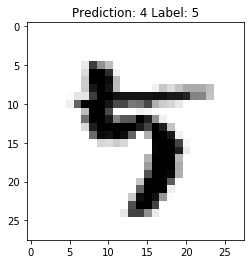

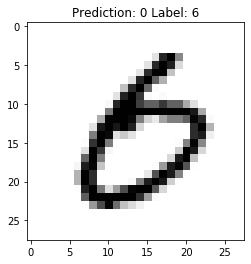

In [8]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat= model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if predicted_cat != label:
        plt.title('Prediction: %d Label: %d'% (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()